In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from scipy.stats import describe

In [ ]:
# # Supongamos que ya cargaste tu DataFrame
# df = pd.read_csv('../data/precios_cervezas_2025.csv')

# df_productos = pd.read_csv("../data/ids_cervezas_enriquecidos.csv")

# # Merge con productos (left join para conservar todos los precios)
# df_merged = df.merge(df_productos, on='id_producto', how='left')

# # Identificá las columnas fijas y las de fechas (pueden ser detectadas automáticamente si querés)
# id_cols = ['id_comercio', 'id_bandera', 'id_sucursal', 'nombre_comercio', 'provincia'] + df_productos.columns.tolist()
# date_cols = [col for col in df.columns if col not in id_cols]

# # Asegurar que los nombres de las columnas de fecha estén en string
# df_merged.columns = df_merged.columns.astype(str)

# # Melt para despivotear
# df_long = df_merged.melt(id_vars=id_cols, value_vars=date_cols,
#                   var_name='fecha', value_name='precio')

# # Convertir fechas de '20250101' a datetime
# df_long['fecha'] = pd.to_datetime(df_long['fecha'], format='%Y%m%d')

# # Ordenar por producto, comercio y fecha
# df_long = df_long.sort_values(by=['id_producto', 'id_comercio', 'fecha'])

# # Opcional: resetear índice
# df_long = df_long.reset_index(drop=True)

# df_long.to_csv("../data/precios_cervezas_2025_transformado.csv", index=False)

: 

In [2]:
df = pd.read_csv('../data/precios_cervezas_2025_transformado.csv')

/var/folders/6c/17qbm4nd5318hd4bcrx68wjh0000gn/T/ipykernel_6584/1648959241.py:1: DtypeWarning: Columns (7,8,10,11,12,13,14,15,17,18,20,26,32,33,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/precios_cervezas_2025_transformado.csv')


## Caso de Negocio
### Problema de Negocio
### Objetivo
### Datos Disponibles
### Variable Target
### Población Objetivo
### Periodos Considerados en el Dataset
### Estrategias y Soluciones Propuestas

## Análisis y Limpieza de Datos

In [3]:
df.head()

,id_comercio,id_bandera,id_sucursal,nombre_comercio,provincia,id_producto,productos_descripcion,barcode_formats,mpn,model,...,weight,release_date,description,features,images,last_update,stores,reviews,fecha,precio
0,12,1,44,COTO CICSA,AR-C,3162330450010,CERVEZA LAGER STARBERG LAT 500 ML,EAN-13 3162330450010,NaN,NaN,...,NaN,NaN,Starberg-beer-500ml-france. Country of origin:...,[],['https://images.barcodelookup.com/81709/81709...,2023-10-23 06:33:04,[],[],2025-01-01,2300.0
1,12,1,45,COTO CICSA,AR-C,3162330450010,CERVEZA LAGER STARBERG LAT 500 ML,EAN-13 3162330450010,NaN,NaN,...,NaN,NaN,Starberg-beer-500ml-france. Country of origin:...,[],['https://images.barcodelookup.com/81709/81709...,2023-10-23 06:33:04,[],[],2025-01-01,2300.0
2,12,1,51,COTO CICSA,AR-B,3162330450010,CERVEZA LAGER STARBERG LAT 500 ML,EAN-13 3162330450010,NaN,NaN,...,NaN,NaN,Starberg-beer-500ml-france. Country of origin:...,[],['https://images.barcodelookup.com/81709/81709...,2023-10-23 06:33:04,[],[],2025-01-01,2300.0
3,12,1,56,COTO CICSA,AR-C,3162330450010,CERVEZA LAGER STARBERG LAT 500 ML,EAN-13 3162330450010,NaN,NaN,...,NaN,NaN,Starberg-beer-500ml-france. Country of origin:...,[],['https://images.barcodelookup.com/81709/81709...,2023-10-23 06:33:04,[],[],2025-01-01,2300.0
4,12,1,60,COTO CICSA,AR-C,3162330450010,CERVEZA LAGER STARBERG LAT 500 ML,EAN-13 3162330450010,NaN,NaN,...,NaN,NaN,Starberg-beer-500ml-france. Country of origin:...,[],['https://images.barcodelookup.com/81709/81709...,2023-10-23 06:33:04,[],[],2025-01-01,2300.0


In [4]:
df.shape

(22054920, 40)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22054920 entries, 0 to 22054919
Data columns (total 40 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   id_comercio              int64  
 1   id_bandera               int64  
 2   id_sucursal              int64  
 3   nombre_comercio          object 
 4   provincia                object 
 5   id_producto              int64  
 6   productos_descripcion    object 
 7   barcode_formats          object 
 8   mpn                      object 
 9   model                    float64
 10  asin                     object 
 11  title                    object 
 12  category                 object 
 13  manufacturer             object 
 14  brand                    object 
 15  contributors             object 
 16  age_group                float64
 17  ingredients              object 
 18  nutrition_facts          object 
 19  energy_efficiency_class  float64
 20  color                    object 
 21  gender

In [6]:
df.describe()

,id_comercio,id_bandera,id_sucursal,id_producto,model,age_group,energy_efficiency_class,gender,material,pattern,format,multipack,length,width,height,weight,release_date,precio
count,2.205492e+07,2.205492e+07,2.205492e+07,2.205492e+07,5760.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.920000e+03,4.920000e+03,4.920000e+03,840.0,0.0,1.577925e+07
mean,1.098896e+01,1.510183e+00,8.464349e+02,7.651990e+12,80185.916667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.900000e-01,3.900000e-01,3.900000e-01,119.0,NaN,4.347986e+03
std,2.712801e+01,8.712664e-01,1.991071e+03,7.620433e+11,32708.995227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.551679e-17,5.551679e-17,5.551679e-17,0.0,NaN,4.288552e+03
min,2.000000e+00,1.000000e+00,1.000000e+00,3.162330e+12,1032.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.900000e-01,3.900000e-01,3.900000e-01,119.0,NaN,2.200000e+01
25%,9.000000e+00,1.000000e+00,1.160000e+02,7.792798e+12,93700.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.900000e-01,3.900000e-01,3.900000e-01,119.0,NaN,2.275000e+03
50%,1.000000e+01,1.000000e+00,2.880000e+02,7.793147e+12,93700.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.900000e-01,3.900000e-01,3.900000e-01,119.0,NaN,2.950000e+03
75%,1.500000e+01,2.000000e+00,7.110000e+02,7.793148e+12,93700.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.900000e-01,3.900000e-01,3.900000e-01,119.0,NaN,4.000000e+03
max,2.013000e+03,5.000000e+00,9.000000e+04,8.725000e+12,93700.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.900000e-01,3.900000e-01,3.900000e-01,119.0,NaN,7.543200e+04


¿Cuantos productos tienen descripción?

In [7]:
df['TieneDescripcion'] = df['last_update'].notna().astype(int)

In [8]:
productos_unicos = df[['id_producto', 'TieneDescripcion']].drop_duplicates()
productos_unicos['TieneDescripcion'].value_counts()

TieneDescripcion
0    376
1     68
Name: count, dtype: int64

In [9]:
df['TieneDescripcion'].value_counts()

TieneDescripcion
0    15082800
1     6972120
Name: count, dtype: int64

In [11]:
# Nos quedamos unicamente con los productos que tienen descripción
df = df[df['TieneDescripcion'] == 1]

¿Cuál es nuestra cartera de productos?

In [12]:
print('Hay {} productos únicos'.format(df['productos_descripcion'].nunique()))

Hay 68 productos únicos


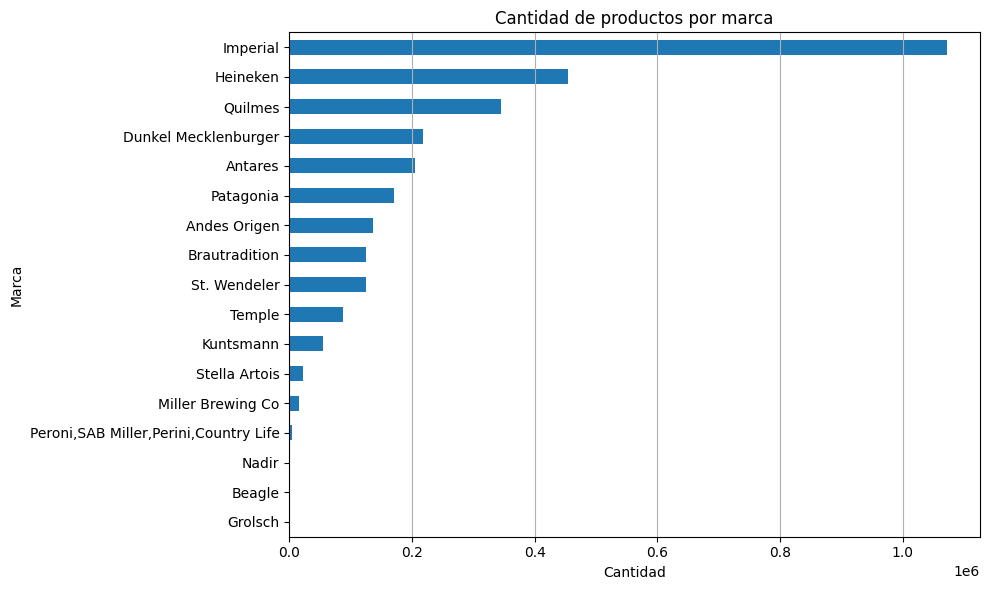

In [13]:
# Suponiendo que ya tenés tu DataFrame cargado como df
brand_counts = df['brand'].value_counts()

# Orden descendente para gráfico horizontal (de mayor a menor arriba)
brand_counts = brand_counts.sort_values(ascending=True)

# Crear gráfico
plt.figure(figsize=(10, 6))
brand_counts.plot(kind='barh')
plt.title('Cantidad de productos por marca')
plt.xlabel('Cantidad')
plt.ylabel('Marca')
plt.tight_layout()
plt.grid(axis='x')
plt.show()

In [18]:
# Simulamos tu Series como ejemplo
sizes_raw = df['size'].astype(str).str.lower().str.strip()

# Reemplazos comunes
sizes_normalized = (
    sizes_raw
    .str.replace(r'cm3|cm³|cc', 'ml', regex=True)
    .str.replace(r'cl', 'cl', regex=True)   # cl = centilitro = 0.1 litros
    .str.replace(r'g$', 'ml', regex=True)     # si asumimos que g = ml (válido para agua/cerveza aprox)
    .str.replace(r'\s+', '', regex=True)      # eliminar espacios
    .str.replace(',', '.', regex=False)       # cambiar coma decimal por punto
)

# Convertir unidades
def parse_volume(v):
    try:
        if 'ml' in v:
            return float(v.replace('ml', ''))
        if 'cl' in v:
            return float(v.replace('cl', '')) * 10
        elif 'l' in v:
            return float(v.replace('l', '')) * 1000
        else:
            return float(v)  # asume que está en ml
    except:
        return None

df['calibre'] = sizes_normalized.apply(parse_volume)

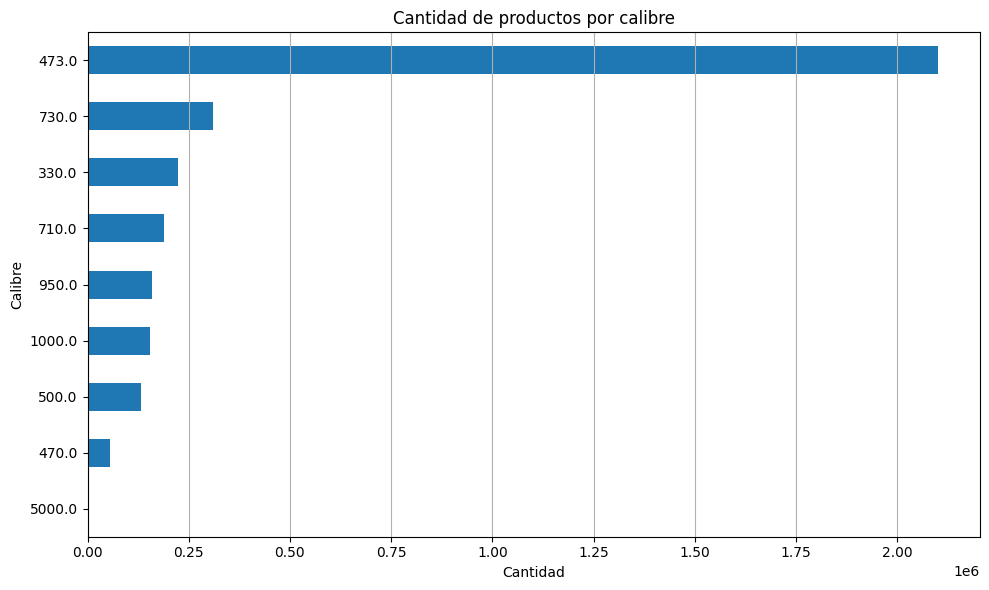

In [19]:
# Suponiendo que ya tenés tu DataFrame cargado como df
brand_counts = df['calibre'].value_counts()

# Orden descendente para gráfico horizontal (de mayor a menor arriba)
brand_counts = brand_counts.sort_values(ascending=True)

# Crear gráfico
plt.figure(figsize=(10, 6))
brand_counts.plot(kind='barh')
plt.title('Cantidad de productos por calibre')
plt.xlabel('Cantidad')
plt.ylabel('Calibre')
plt.tight_layout()
plt.grid(axis='x')
plt.show()

¿Hay más de un registro distinto para la misma combinación de producto, comercio, fecha y precio?

In [ ]:
# ¿Hay más de un registro distinto para la misma combinación de producto, comercio, fecha y precio?
duplicados = df.groupby(['id_producto', 'id_comercio', 'fecha', 'precio']).size().reset_index(name='counts')

# Paso 2: ordenar por cantidad de duplicados (de mayor a menor)
duplicados = duplicados.sort_values(by='counts', ascending=False)

In [56]:
duplicados.head()

,id_producto,id_comercio,fecha,precio,counts
791,4002631022792,15,2025-03-04,995.0,1034
281513,7798091030299,15,2025-01-21,3100.0,1034
737,4002631022792,15,2025-01-11,990.0,1034
281514,7798091030299,15,2025-01-22,3100.0,1034
736,4002631022792,15,2025-01-10,990.0,1034


In [57]:
# Tomo el id de comercio y producto con mas duplicados
ejemplo = duplicados.iloc[0]
df[(df['id_producto'] == ejemplo['id_producto']) & (df['id_comercio'] == ejemplo['id_comercio']) & (df['fecha'] == ejemplo['fecha'])]

,id_comercio,id_bandera,id_sucursal,nombre_comercio,provincia,id_producto,productos_descripcion,fecha,precio
195516,15,1,1,Supermercados DIA,AR-C,4002631022792,CERVEZA ALEMANA,2025-03-04,995.0
195517,15,1,3,Supermercados DIA,AR-C,4002631022792,CERVEZA ALEMANA,2025-03-04,995.0
195518,15,1,4,Supermercados DIA,AR-C,4002631022792,CERVEZA ALEMANA,2025-03-04,995.0
195519,15,1,5,Supermercados DIA,AR-C,4002631022792,CERVEZA ALEMANA,2025-03-04,995.0
195520,15,1,6,Supermercados DIA,AR-C,4002631022792,CERVEZA ALEMANA,2025-03-04,995.0
...,...,...,...,...,...,...,...,...,...
196549,15,1,8014,Supermercados DIA,AR-A,4002631022792,CERVEZA ALEMANA,2025-03-04,995.0
196550,15,1,8016,Supermercados DIA,AR-A,4002631022792,CERVEZA ALEMANA,2025-03-04,995.0
196551,15,1,8017,Supermercados DIA,AR-A,4002631022792,CERVEZA ALEMANA,2025-03-04,995.0
196552,15,1,8018,Supermercados DIA,AR-J,4002631022792,CERVEZA ALEMANA,2025-03-04,995.0


In [62]:
df.head()

,id_comercio,id_bandera,id_sucursal,nombre_comercio,provincia,id_producto,productos_descripcion,fecha,precio
0,12,1,44,COTO CICSA,AR-C,3162330450010,CERVEZA LAGER STARBERG LAT 500 ML,2025-01-01,2300.0
1,12,1,45,COTO CICSA,AR-C,3162330450010,CERVEZA LAGER STARBERG LAT 500 ML,2025-01-01,2300.0
2,12,1,51,COTO CICSA,AR-B,3162330450010,CERVEZA LAGER STARBERG LAT 500 ML,2025-01-01,2300.0
3,12,1,56,COTO CICSA,AR-C,3162330450010,CERVEZA LAGER STARBERG LAT 500 ML,2025-01-01,2300.0
4,12,1,60,COTO CICSA,AR-C,3162330450010,CERVEZA LAGER STARBERG LAT 500 ML,2025-01-01,2300.0
